<a href="https://colab.research.google.com/github/kibutan/freeCodeCamp/blob/main/machine-learning-with-python/fcc_predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

Make sure to convert categorical data to numbers. Use 80% of the data as the `train_dataset` and 20% of the data as the `test_dataset`.

`pop` off the "expenses" column from these datasets to create new datasets called `train_labels` and `test_labels`. Use these labels when training your model.

Create a model and train it with the `train_dataset`. Run the final cell in this notebook to check your model. The final cell will use the unseen `test_dataset` to check how well the model generalizes.

To pass the challenge, `model.evaluate` must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the `test_dataset` and graph the results.

* ワンホットエンコーディング
* expensesの数字を予測しているか
* ハイパーパラメータの調整




In [2]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [14]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2021-11-08 04:29:36--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.1’

insurance.csv.1     100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2021-11-08 04:29:36 (80.4 MB/s) - ‘insurance.csv.1’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [25]:
dataset.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
expenses    float64
dtype: object

[データ分割 With out Sklern train_test_split](https://www.tensorflow.org/tutorials/keras/regression?hl=ja#:~:text=train_dataset%20%3D%20dataset.sample(frac%3D0.8%2Crandom_state%3D0))

TF
での回帰なので上記リンクの手順を追う

In [4]:
# dataset_dum = pd.get_dummies(dataset)
# ダミー変数をこれで取得出来るのではあるが、これの採点ではTestDatasetをつかうし、列を増やすこと自体は余り自然でない気がする。
# 最も、列を増やしたとて同じ結果を出せるはずではあるが。

In [16]:
dataset_dum


,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,0,1,1,0,0,1,0,0
1334,18,31.9,0,2205.98,1,0,1,0,1,0,0,0
1335,18,36.9,0,1629.83,1,0,1,0,0,0,1,0
1336,21,25.8,0,2007.95,1,0,1,0,0,0,0,1


In [17]:
#One Hot Encoding
dataset['sex'].replace(['male','female'], [0, 1], inplace=True)
dataset['smoker'].replace(['no','yes'], [0, 1], inplace=True)

In [18]:
dataset["region"] = dataset["region"].map({"northeast":0,"northwest":1,"southeast":2,"southwest":3}).astype(int)

In [19]:
dataset

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,3,16884.92
1,18,0,33.8,1,0,2,1725.55
2,28,0,33.0,3,0,2,4449.46
3,33,0,22.7,0,0,1,21984.47
4,32,0,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,0,31.0,3,0,1,10600.55
1334,18,1,31.9,0,0,0,2205.98
1335,18,1,36.9,0,0,2,1629.83
1336,21,1,25.8,0,0,3,2007.95


In [26]:

train_dataset = dataset.sample(frac = 0.8, random_state = 0)
test_dataset = dataset.drop(train_dataset.index)

In [27]:
train_labels = train_dataset.pop("expenses")
test_labels = test_dataset.pop("expenses")

In [111]:
train_dataset

,age,sex,bmi,children,smoker,region
578,52,0,30.2,1,0,3
610,47,1,29.4,1,0,2
569,48,0,40.6,2,1,1
1034,61,0,38.4,0,0,1
198,51,1,18.1,0,0,1
...,...,...,...,...,...,...
584,19,0,20.7,0,0,3
147,51,1,37.7,1,0,2
160,42,1,26.6,0,1,1
750,37,1,26.4,0,1,2


In [29]:
train_labels

578      9724.53
610      8547.69
569     45702.02
1034    12950.07
198      9644.25
          ...   
584      1242.82
147      9877.61
160     21348.71
750     19539.24
859     10965.45
Name: expenses, Length: 1070, dtype: float64

正規化

In [108]:
# train_stats = train_dataset.describe().drop(["region","sex","smoker"],axis = 1).transpose()
train_stats = train_dataset.describe().transpose()

train_stats

,count,mean,std,min,25%,50%,75%,max
age,1070.0,39.036449,14.142122,18.0,26.0,39.0,51.0,64.0
sex,1070.0,0.501869,0.500230,0.0,0.0,1.0,1.0,1.0
bmi,1070.0,30.737290,6.065193,16.0,26.3,30.5,34.8,53.1
children,1070.0,1.093458,1.211364,0.0,0.0,1.0,2.0,5.0
smoker,1070.0,0.199065,0.399484,0.0,0.0,0.0,0.0,1.0
region,1070.0,1.501869,1.103399,0.0,1.0,2.0,2.0,3.0


In [ ]:
# normad_train_data = normad_train_data.drop(["region","sex","smoker"],axis=1)

In [ ]:
# normad_test_data = normad_test_data.drop(["region","sex","smoker"],axis=1)


In [110]:
normad_train_data

,age,sex,bmi,children,smoker,region
578,0.916662,-1.003276,-0.088586,-0.077151,-0.498306,1.357742
610,0.563109,0.995803,-0.220486,-0.077151,-0.498306,0.451451
569,0.633819,-1.003276,1.626116,0.748365,2.004922,-0.454839
1034,1.553059,-1.003276,1.263391,-0.902667,-0.498306,-0.454839
198,0.845952,0.995803,-2.083576,-0.902667,-0.498306,-0.454839
...,...,...,...,...,...,...
584,-1.416792,-1.003276,-1.654900,-0.902667,-0.498306,1.357742
147,0.845952,0.995803,1.147978,-0.077151,-0.498306,0.451451
160,0.209555,0.995803,-0.682137,-0.902667,2.004922,-0.454839
750,-0.143999,0.995803,-0.715112,-0.902667,2.004922,0.451451


評価をnorm_test_dataでなくTest＿だたで行ってるので、ここでTestDataも正規化

In [145]:
def norm(x):
  return (x - train_stats["mean"]) / train_stats["std"]
normad_train_data = norm(train_dataset)
test_dataset = norm(test_dataset)

In [134]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation = "relu", input_shape = [len(normad_train_data.keys())]),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)
  ])
  optimizer = tf.keras.optimizers.RMSprop(0.1)
  model.compile(loss = "mse",
                optimizer = optimizer,
                metrics = ["mae","mse"]
                )
  return model

In [135]:
model = build_model()

In [136]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 64)                448       
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 65        
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [137]:
# example_batch = normad_train_data[:10]
# example_result = model.predict(example_batch)
# example_result

array([[-0.64729756],
       [-0.19911388],
       [-0.5845118 ],
       [-0.7133897 ],
       [-0.54375935],
       [-0.5755672 ],
       [-0.44931394],
       [-0.5195872 ],
       [-0.35647544],
       [-0.48744836]], dtype=float32)

In [148]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0:print("")
    print(".",end = "")
EPOCHS = 1000
early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss",patience=10)
history = model.fit(
    normad_train_data, train_labels,
    epochs=EPOCHS, validation_split = 0.2,verbose = 0,
    callbacks = [early_stop,PrintDot()]
)


............................

In [149]:
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
23,16818854.0,2441.766113,16818854.0,21205994.0,2248.161865,21205994.0,23
24,16291076.0,2339.282959,16291076.0,20773186.0,2214.750732,20773186.0,24
25,17401010.0,2450.946045,17401010.0,22000810.0,3290.703857,22000810.0,25
26,16350879.0,2423.286865,16350879.0,20869056.0,2895.374023,20869056.0,26
27,16528055.0,2401.044189,16528055.0,22047166.0,2207.085938,22047166.0,27


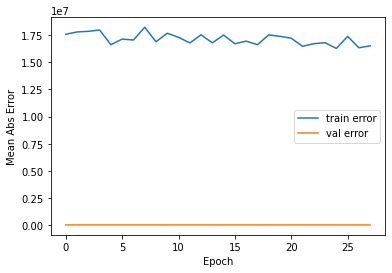

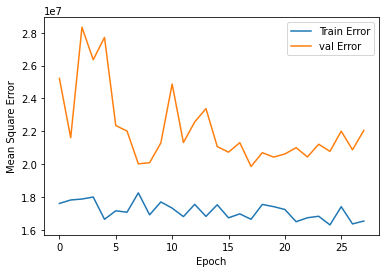

In [150]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist["epoch"] = history.epoch

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Mean Abs Error")
  plt.plot(hist["epoch"], hist["mse"],label = "train error")
  plt.plot(hist["epoch"], hist["val_mae"],label = "val error")
  # plt.ylim([0.0,5.0])
  plt.legend()

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Mean Square Error")
  plt.plot(hist["epoch"], hist["mse"], label = "Train Error")
  plt.plot(hist["epoch"], hist["val_mse"], label = "val Error")
  plt.legend()
  plt.show()

plot_history(history)

In [151]:
loss, mae, mse = model.evaluate(test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

9/9 - 0s - loss: 32775398.0000 - mae: 2703.4446 - mse: 32775398.0000
Testing set Mean Abs Error: 2703.44 MPG


TEST通らない問題、TESTとして入力していたのが、正規化されていないTestでーただったから出会った。おしまい。

9/9 - 0s - loss: 32775398.0000 - mae: 2703.4446 - mse: 32775398.0000
Testing set Mean Abs Error: 2703.44 expenses
You passed the challenge. Great job!


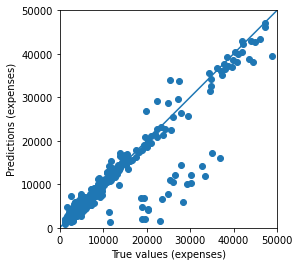

In [152]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
